# Jakobsenův algoritmus

Jakobsenův algoritmus je navržený pro útoky na jednoduché monoalfabetické a polyalfabetické substituční šifry. Využívá statistickou četnost bigramů (dvojic písmen) k optimalizaci dešifrovacího klíče na základě rozložení četností dešifrovaného textu oproti rozložením četností očekávaného jazyka.

Tato práce se zabývá analýzou přesnosti implementovaného Jakobsenova algoritu pro dešifrování monoalfabetických substitušních šifer. Je zde implementována deterministická a náhodná verze využívající horolezcův algoritmus.

### Popis Jakobsenova algoritmu
Vstup: šifrovaný text, frekvence bigramů jazyka šifrovaného textu $E_{ij}$
1. Počáteční odhad klíče pro dešifrování s využitím frekvenční analýzy
2. Dešifrování šifrovaného textu pomocí odhadu klíče, získáno $t$
3. Výpočet skóre nebo také rozdílnosti matic bigramů: $f(t) = \sum_{i}\sum_{j} |D_{ij}(t) - E_{ij}|$
   
   kde $D(t)$ je matice bigramů dešifrovaného textu  $t$ pomocí odhadu, a $E$ je očekávaná hodnota frekvencí bigramů.
4. OPAKUJ
   1. Vyber a zaměň řádky/sloupce a,b matice bigram.
   2. Získej nový odhad klíče a dešifruj text.
   3. Vypočti nové skóre $f(t)$.
   4. Pokud je nové skóre lepší ulož si odhad klíče.
5. DOKUD není dosaženo maximálního počtu iterací bez zlepšení nebo nedošli permutace $a,b$.
6. VRAŤ odhad klíče.

## Ukázka využití Jakobsenova algoritmu

In [4]:
from string import ascii_letters, ascii_lowercase
from rich.progress import track
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

from utils import random_substitution_cipher, perform_frequency_analysis, decipher_text, count_key_acc, count_text_decryption_acc
from ngram_analyzer import NGramAnalyzer
from jacobsen_algorithm import JacobsenAlgorithm

### load data

In [5]:
data_dir = Path("../data/")

# List to hold the contents of each text file
files = {}

# Iterate over all text files in the directory
for file_path in data_dir.glob('*.txt'):
    # Read the contents of the file
    with file_path.open('r', encoding='utf-8') as file:
        files[file_path.stem] = file.read()

print(list(files.keys()))
print(files["hobbit"][:250])

['frankenstein', 'hobbit', 'wiki']
THE HOBBIT 


Seldom has a story been as widely praised as The 
Hobbit. By parents, teachers, reviewers, and especially 
by children themselves. Within a tew years its hero, 
Bilbo Baggins has taken his place among the ranks 
of the immortals: Alice,


In [8]:
ngram_analyzer = NGramAnalyzer("../data/ngrams-all.tsv")

/home/thor/school/AKA/src/ngram_analyzer.py:8: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(file_path, delimiter='\t', header=0, index_col=0, keep_default_na=False, na_filter=False)


In [9]:
ciphered_text, actual_key = random_substitution_cipher(files["hobbit"])
print(ciphered_text, actual_key)
print(decipher_text(ciphered_text, actual_key))

duvuexxzdhviceounhnhdesrxvvynhpzcvirbsnzhvcnhduvuexxzdxrbnsvydhdvnmuvshsvkzvpvshnycvhbvmzniirxrmuzicsvyduvohvikvhpzduzyndvprvnshzdhuvsexzixexnqqzyhunhdnwvyuzhbinmvnoeyqduvsnywhejduvzooesdnihnizmvbeeudencnhpzduniihamuminhhzmhvyterovydxasqveyhndvnmuhammvhhzkvsvnczyqnycqsepyabhnhoamunhmuzicsvyjvviduvbedvymrejzdhhbviizdzhndnivejuzqunckvydasvaycvsdnwvyxrnmeobnyrejcpnskvhzyhvnsmuejcsnqeyqanscvcqeicnsviamdnydbnsdyvseyduzhbvszieahlavhdzhxzixexnqqzyhnmeojesdiekzyqaynoxzdzeahuexxzdpuehasbszhvhvkvyuzohvijxruzhsvheasmvjaiyvhhnychwziinhnxasqinsvymeaydvshpzduqznydhbzcvshzyduvinxrszyduhejozswpeecnycduvvkziqexizyhdundizkvnoeyqduvseedhejduvozhdroeaydnzyhduvbnibzdndzyqcvizmnmrejxzixehmeykvshndzeyhpzduduvcsnqeyhonaqnycduvqsnycmizongzyduvxnddivejduvjzkvnsozvhnsvhabsvovirvgmzdzyqzymzcvydhxadduvsvnsvueovizvsoeovydhdeeqeecjviiephuzbnycpvimeovovnihnieyqduvsencinaqudvsnycheyqnycniiduvjsvhuyvhhejnyvnsirpesicduvuexxzdzhzyzdhvijnmeobivdvnyconskviieahdnivpuzmuonrxvsvncdeduvkvsrreayqesqzkvydemuzicsvyejnyrnqvdesvncj

In [10]:
plain_letter_freq = perform_frequency_analysis(files["hobbit"].lower())
plain_letter_freq

{'e': 12.254598778979291,
 't': 9.239954510993178,
 'a': 8.155849726666933,
 'o': 7.793982682255297,
 'n': 7.008150113722516,
 'h': 6.782700211483979,
 'i': 6.287658114201348,
 's': 5.798102629583815,
 'r': 5.5604325445911975,
 'd': 5.0661386217628985,
 'l': 4.465105143449982,
 'u': 2.735325805035713,
 'w': 2.703403694984239,
 'g': 2.6041458840429352,
 'f': 2.2859223494672998,
 'm': 2.139778939387894,
 'b': 2.0355332987510475,
 'y': 1.861208650891824,
 'c': 1.7135688919037546,
 'p': 1.349457324129125,
 'k': 0.9609053908463349,
 'v': 0.8890806432305175,
 'j': 0.08878336858066319,
 'q': 0.08404493036989745,
 'x': 0.08005466661346315,
 'z': 0.05611308407485735}

In [11]:
# Perform frequency analysis on the cipher text
cipher_freq_ordered = perform_frequency_analysis(ciphered_text)
cipher_freq_ordered

{'v': 12.254598778979291,
 'd': 9.239954510993178,
 'n': 8.155849726666933,
 'e': 7.793982682255297,
 'y': 7.008150113722516,
 'u': 6.782700211483979,
 'z': 6.287658114201348,
 'h': 5.798102629583815,
 's': 5.5604325445911975,
 'c': 5.0661386217628985,
 'i': 4.465105143449982,
 'a': 2.735325805035713,
 'p': 2.703403694984239,
 'q': 2.6041458840429352,
 'j': 2.2859223494672998,
 'o': 2.139778939387894,
 'x': 2.0355332987510475,
 'r': 1.861208650891824,
 'm': 1.7135688919037546,
 'b': 1.349457324129125,
 'w': 0.9609053908463349,
 'k': 0.8890806432305175,
 't': 0.08878336858066319,
 'l': 0.08404493036989745,
 'g': 0.08005466661346315,
 'f': 0.05611308407485735}

In [12]:
jacobsen_alg = JacobsenAlgorithm(ngram_analyzer=ngram_analyzer)

In [24]:
jacobs_det_key = jacobsen_alg.optimize_bigram_matrix(ciphered_text, random_swap_gen=False)
key_acc = count_key_acc(jacobs_det_key, actual_key, ngram_analyzer.get_en_letters_sorted())
text_acc = count_text_decryption_acc(jacobs_det_key, ngram_analyzer.en_letter_freq, ciphered_text, files["hobbit"])
print(f"key acc: {key_acc}, text acc: {text_acc}")

key acc: (0.8461538461538461, {'p': 'w', 'o': 'm', 'x': 'b', 'b': 'p'}), text acc: 0.917718267427477


In [26]:
jacobs_rand_key = jacobsen_alg.optimize_bigram_matrix(ciphered_text, random_swap_gen=True, max_iters=100000)
key_acc = count_key_acc(jacobs_rand_key, actual_key, ngram_analyzer.get_en_letters_sorted())
text_acc = count_text_decryption_acc(jacobs_rand_key, ngram_analyzer.en_letter_freq, ciphered_text, files["hobbit"])
print(f"key acc: {key_acc}, text acc: {text_acc}")

key acc: (0.9230769230769231, {'l': 'q', 'g': 'x'}), text acc: 0.9983590040301664


In [27]:
print(ciphered_text)
print(decipher_text(ciphered_text, jacobs_rand_key, ngram_analyzer.get_en_letter_freq()))
print(''.join([char for char in files["hobbit"].lower() if char in ascii_lowercase]))

duvuexxzdhviceounhnhdesrxvvynhpzcvirbsnzhvcnhduvuexxzdxrbnsvydhdvnmuvshsvkzvpvshnycvhbvmzniirxrmuzicsvyduvohvikvhpzduzyndvprvnshzdhuvsexzixexnqqzyhunhdnwvyuzhbinmvnoeyqduvsnywhejduvzooesdnihnizmvbeeudencnhpzduniihamuminhhzmhvyterovydxasqveyhndvnmuhammvhhzkvsvnczyqnycqsepyabhnhoamunhmuzicsvyjvviduvbedvymrejzdhhbviizdzhndnivejuzqunckvydasvaycvsdnwvyxrnmeobnyrejcpnskvhzyhvnsmuejcsnqeyqanscvcqeicnsviamdnydbnsdyvseyduzhbvszieahlavhdzhxzixexnqqzyhnmeojesdiekzyqaynoxzdzeahuexxzdpuehasbszhvhvkvyuzohvijxruzhsvheasmvjaiyvhhnychwziinhnxasqinsvymeaydvshpzduqznydhbzcvshzyduvinxrszyduhejozswpeecnycduvvkziqexizyhdundizkvnoeyqduvseedhejduvozhdroeaydnzyhduvbnibzdndzyqcvizmnmrejxzixehmeykvshndzeyhpzduduvcsnqeyhonaqnycduvqsnycmizongzyduvxnddivejduvjzkvnsozvhnsvhabsvovirvgmzdzyqzymzcvydhxadduvsvnsvueovizvsoeovydhdeeqeecjviiephuzbnycpvimeovovnihnieyqduvsencinaqudvsnycheyqnycniiduvjsvhuyvhhejnyvnsirpesicduvuexxzdzhzyzdhvijnmeobivdvnyconskviieahdnivpuzmuonrxvsvncdeduvkvsrreayqesqzkvydemuzicsvyejnyrnqvdesvncj

In [ ]:
def plot_accuracy_over_text_length(text_files: dict, start_text_len: int, end_text_len: int, num_of_iters: int, random_swap=False):

    def moving_average(data, window_size=int(num_of_iters * 0.1)):
        return np.convolve(data, np.ones(window_size), 'valid') / window_size

    # Function to measure decryption accuracy over varying text lengths
    accuracies = [[] for _ in text_files]
    clean_full_texts = ["".join([char.lower() for char in text if char in ascii_letters]) for text in text_files.values()]
    ciphered_text = [random_substitution_cipher(text)[0] for text in clean_full_texts]
    lengths = np.logspace(np.log10(start_text_len), np.log10(end_text_len), num=num_of_iters, dtype=int)

    for length in track(lengths,description="Measuring text decryption accuracy based on text length."):
        for idx, text in enumerate(clean_full_texts):
            snippet = text[:length]
            ciphered_snippet = ciphered_text[idx][:length]
            snippet_key = jacobsen_alg.optimize_bigram_matrix(ciphered_snippet, random_swap_gen=random_swap)
            accuracy = count_text_decryption_acc(snippet_key, ngram_analyzer.en_letter_freq, ciphered_snippet, snippet)
            accuracies[idx].append((length, accuracy))

    smooth_acc = [moving_average([acc for _, acc in accuracy]) for accuracy in accuracies]
    lens_smooth = [lengths[:len(acc)] for acc in smooth_acc]
    
    # Plotting the results
    plt.figure(figsize=(10, 5))
    for idx, name in enumerate(text_files.keys()):
        plt.plot(lens_smooth[idx], smooth_acc[idx], label=name)
    plt.title('Decryption Accuracy vs. Text Length')
    plt.xlabel('Text Length')
    plt.ylabel('Decryption Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

    return lengths, accuracies

Output()

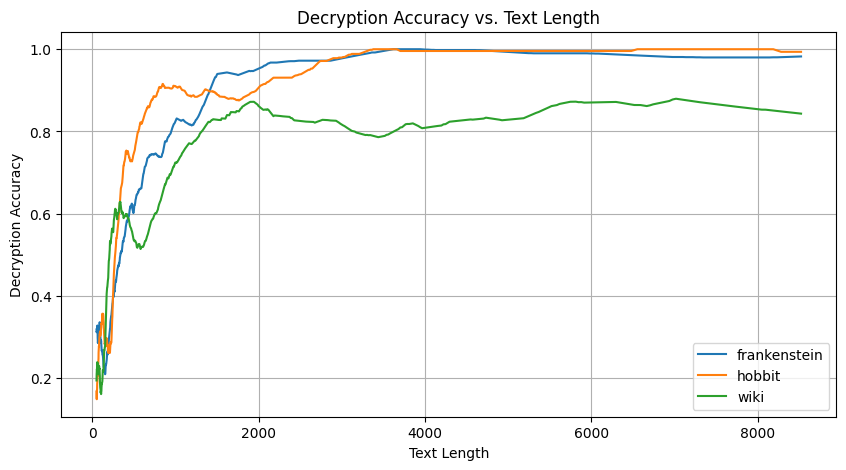

In [ ]:
# Assuming 'ciphered_text' and 'actual_key' are available from your previous functions
lengths, accuracies = plot_accuracy_over_text_length(files, 50, 15000, 1000)

Output()

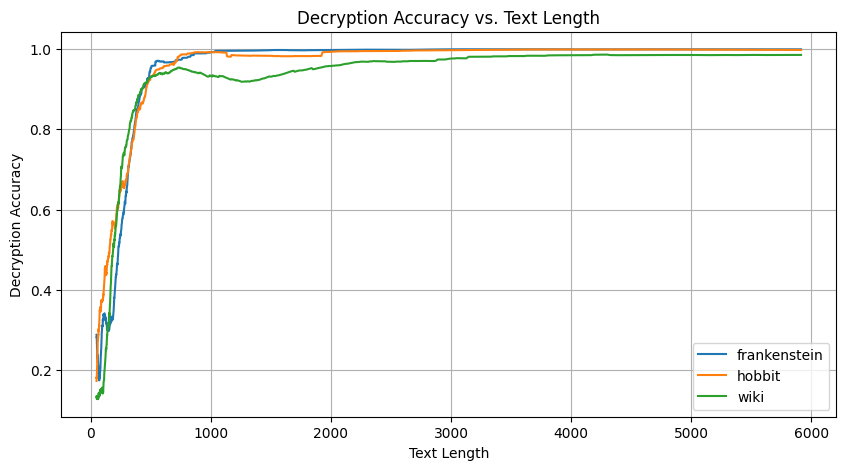

In [ ]:
# Assuming 'ciphered_text' and 'actual_key' are available from your previous functions
lengths, accuracies = plot_accuracy_over_text_length(files, 50, 10000, 1000, random_swap=True)

# Zdroje
https://www.researchgate.net/profile/Thomas-Jakobsen-6/publication/266714630_A_fast_method_for_cryptanalysis_of_substitution_ciphers/links/56ebe4fe08aefd0fc1c718ef/A-fast-method-for-cryptanalysis-of-substitution-ciphers.pdf

http://norvig.com/mayzner.html

https://github.com/alimony/cipher_solver/tree/master

